# <center> Covid19 Prediction using symptoms
#### Author: C.Koushik

# Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split

# Reading dataset

In [2]:
df=pd.read_csv("covid_symptoms.csv")
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
211424,0.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Other
211425,0.0,0.0,0.0,0.0,0.0,1.0,No,Male,Other
211426,0.0,0.0,0.0,0.0,0.0,1.0,No,NaN,Other
211427,0.0,0.0,0.0,0.0,0.0,1.0,No,Female,Other


In [3]:
df.head(20)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
1,1.0,1.0,0.0,0.0,0.0,0.0,No,Male,Abroad
2,0.0,1.0,0.0,0.0,0.0,0.0,Yes,Male,Contact with confirmed
3,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Abroad
4,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Female,Contact with confirmed
5,1.0,1.0,0.0,0.0,0.0,1.0,Yes,Male,Contact with confirmed
6,0.0,0.0,0.0,0.0,0.0,0.0,No,Male,Other
7,1.0,1.0,1.0,0.0,1.0,0.0,No,Female,Abroad
8,1.0,0.0,1.0,0.0,0.0,0.0,No,Female,Abroad
9,1.0,1.0,1.0,1.0,0.0,0.0,No,Female,Abroad


# Data Preprocessing

### Removing null values


In [4]:
df.isnull().sum()

cough                   243
fever                   243
sore_throat             243
shortness_of_breath     243
head_ache               243
corona_result           243
age_60_and_above        243
gender                 5371
test_indication         243
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

#### There are no null values

In [7]:
np.shape(df)

(206058, 9)

### Replacing categorical variables with numbers

In [8]:
df=df.replace(to_replace="No", value=0.0)
df=df.replace(to_replace="Yes", value=1.0)

In [9]:
df=df.replace(to_replace="Male", value=0.0)
df=df.replace(to_replace="Female",value=1.0)

In [10]:
df=df.replace(to_replace="Other", value=1.0)
df=df.replace(to_replace="Abroad", value=2.0)
df=df.replace(to_replace="Contact with confirmed",value=3.0)

In [11]:
df.head(10)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0
3,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0
5,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
9,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0


# Distribution of positive and negative results

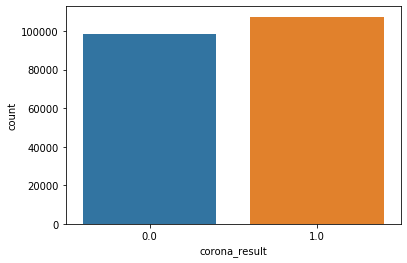

In [12]:
sn.countplot(df["corona_result"])
plt.show()

# Checking for relationship among variables


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
cough,1.000000,0.405062,0.202896,0.195795,0.220778,0.377659,0.000766,-0.039114,0.301624
fever,0.405062,1.000000,0.160196,0.180182,0.247458,0.437327,0.073613,-0.087300,0.241511
sore_throat,0.202896,0.160196,1.000000,0.150116,0.282549,0.264471,-0.032025,0.035454,0.175073
shortness_of_breath,0.195795,0.180182,0.150116,1.000000,0.162358,0.222676,0.032874,-0.000051,0.112905
head_ache,0.220778,0.247458,0.282549,0.162358,1.000000,0.330164,-0.045978,0.019952,0.217364
corona_result,0.377659,0.437327,0.264471,0.222676,0.330164,1.000000,0.051769,-0.066191,0.540474
age_60_and_above,0.000766,0.073613,-0.032025,0.032874,-0.045978,0.051769,1.000000,0.012782,-0.046620
gender,-0.039114,-0.087300,0.035454,-0.000051,0.019952,-0.066191,0.012782,1.000000,0.011922
test_indication,0.301624,0.241511,0.175073,0.112905,0.217364,0.540474,-0.046620,0.011922,1.000000


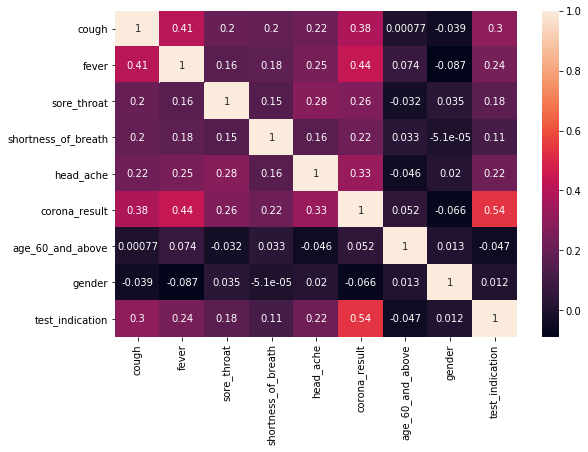

In [13]:
plt.figure(figsize=(9,6))
c=df.corr()
sn.heatmap(c,xticklabels=c.columns,yticklabels=c.columns,annot=True)
c

# Train-Test split 

In [14]:
df.columns

Index(['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache',
       'corona_result', 'age_60_and_above', 'gender', 'test_indication'],
      dtype='object')

In [15]:
X=df[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 
      'age_60_and_above', 'gender', 'test_indication']]

In [16]:
y=df['corona_result']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8496942638066582

In [21]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[21818,  2836],
       [ 4907, 21954]], dtype=int64)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85     24654
         1.0       0.89      0.82      0.85     26861

    accuracy                           0.85     51515
   macro avg       0.85      0.85      0.85     51515
weighted avg       0.85      0.85      0.85     51515



# K-Neighbors classification

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [24]:
y_pred_knn=knn.predict(X_test)

In [25]:
accuracy_score(y_test,y_pred_knn)

0.8200524119188586

In [26]:
confusion_matrix(y_test,y_pred_knn)

array([[23697,   957],
       [ 8313, 18548]], dtype=int64)

In [27]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.74      0.96      0.84     24654
         1.0       0.95      0.69      0.80     26861

    accuracy                           0.82     51515
   macro avg       0.85      0.83      0.82     51515
weighted avg       0.85      0.82      0.82     51515



# Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()

In [29]:
clf.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
pred_gb=clf.predict(X_test)

In [31]:
accuracy_score(y_test,pred_gb)

0.8627001844123071

In [32]:
confusion_matrix(y_test,pred_gb) 

array([[22445,  2209],
       [ 4864, 21997]], dtype=int64)

In [33]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86     24654
         1.0       0.91      0.82      0.86     26861

    accuracy                           0.86     51515
   macro avg       0.87      0.86      0.86     51515
weighted avg       0.87      0.86      0.86     51515



# RandomForest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(max_depth=2)

In [35]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
pred_rfc=rfc.predict(X_test)

In [37]:
accuracy_score(y_test,pred_rfc)

0.845811899446763

In [38]:
confusion_matrix(y_test,pred_rfc)

array([[21736,  2918],
       [ 5025, 21836]], dtype=int64)

In [39]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.85     24654
         1.0       0.88      0.81      0.85     26861

    accuracy                           0.85     51515
   macro avg       0.85      0.85      0.85     51515
weighted avg       0.85      0.85      0.85     51515



# Accuracy Results

<b>
    <li>Logistic Regression- 84.96%
    <li>K-Neighbors Classification- 82.00%
    <li>Gradient Boosting- 86.27%
    <li>RandomForest Classifier- 84.58%
    

### Gradient boosting gives the best results